**Proyecto entrega 1**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Cargar el dataset
df = pd.read_csv("UCI_Credit_Card.csv")

# Vista general del dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


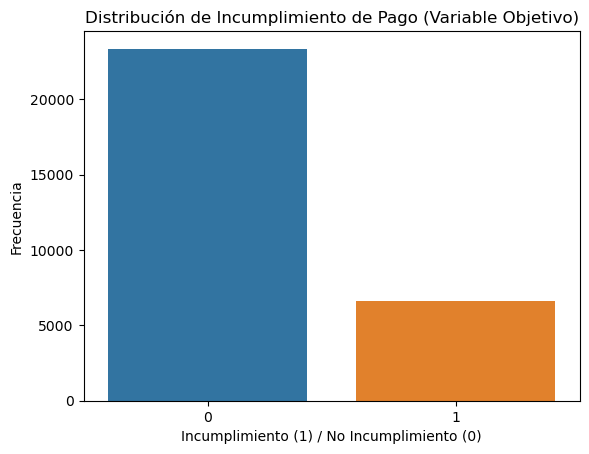

In [14]:
# Resumen estadístico
df.describe()

# Distribución de la variable objetivo
target_counts = df['default.payment.next.month'].value_counts(normalize=True)
print(target_counts)

# Visualizar distribución de la variable objetivo
sns.countplot(data=df, x='default.payment.next.month')
plt.title("Distribución de Incumplimiento de Pago (Variable Objetivo)")
plt.xlabel("Incumplimiento (1) / No Incumplimiento (0)")
plt.ylabel("Frecuencia")
plt.show()


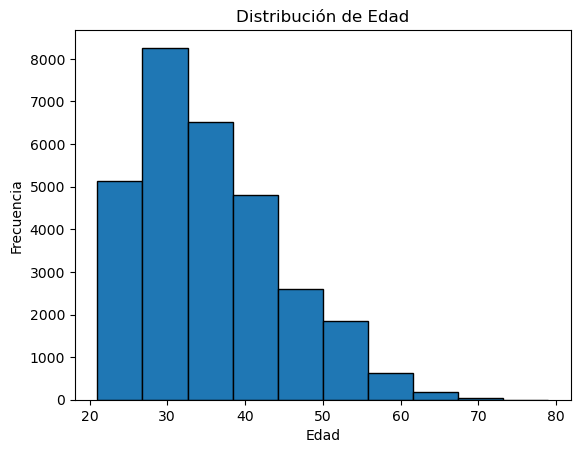

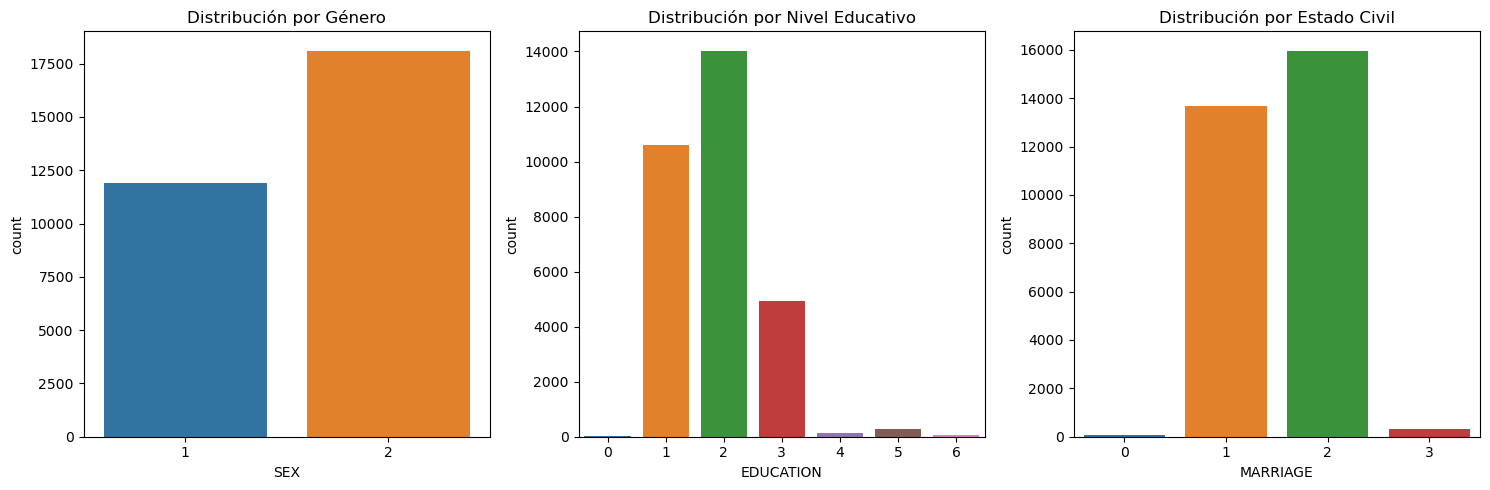

In [15]:
# Histograma de la edad
plt.hist(df['AGE'], bins=10, edgecolor='black')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='SEX', ax=axes[0])
sns.countplot(data=df, x='EDUCATION', ax=axes[1])
sns.countplot(data=df, x='MARRIAGE', ax=axes[2])

axes[0].set_title("Distribución por Género")
axes[1].set_title("Distribución por Nivel Educativo")
axes[2].set_title("Distribución por Estado Civil")
plt.tight_layout()
plt.show()


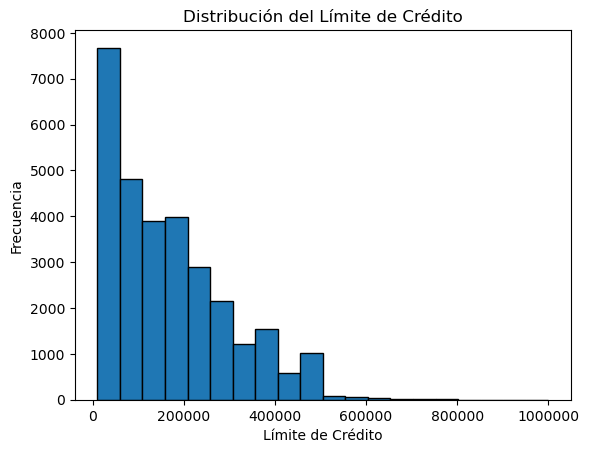

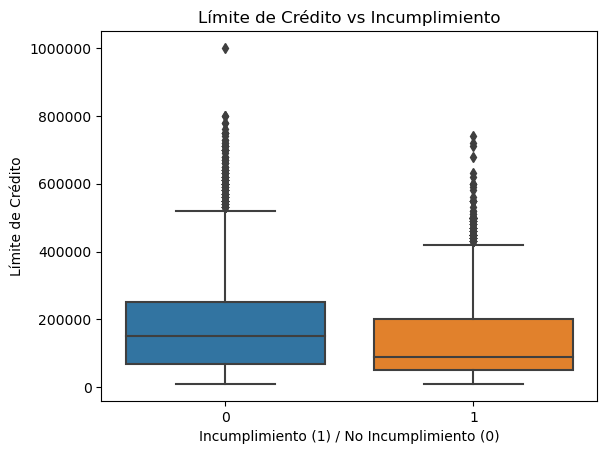

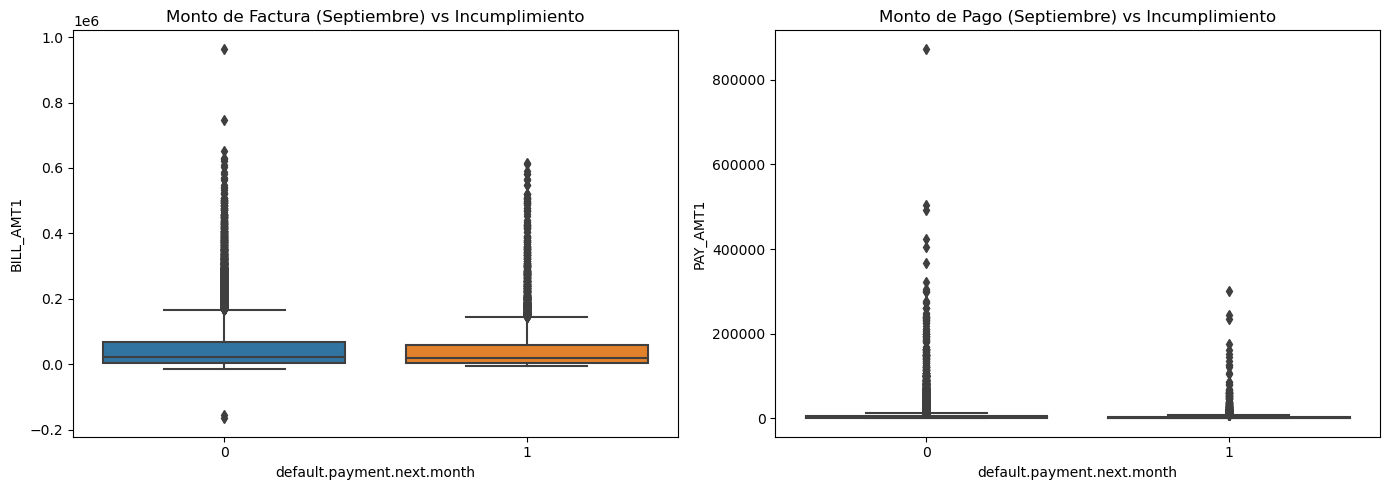

In [18]:
# Histograma del límite de crédito
plt.hist(df['LIMIT_BAL'], bins=20, edgecolor='black')
plt.title("Distribución del Límite de Crédito")
plt.xlabel("Límite de Crédito")
plt.ylabel("Frecuencia")

# Evitar notación científica en el eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

# Diagramas de dispersión entre el límite de crédito y el incumplimiento
sns.boxplot(data=df, x='default.payment.next.month', y='LIMIT_BAL')
plt.title("Límite de Crédito vs Incumplimiento")
plt.xlabel("Incumplimiento (1) / No Incumplimiento (0)")
plt.ylabel("Límite de Crédito")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Comparar montos de facturas y pagos entre incumplidores y no incumplidores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='default.payment.next.month', y='BILL_AMT1', ax=axes[0])
sns.boxplot(data=df, x='default.payment.next.month', y='PAY_AMT1', ax=axes[1])

axes[0].set_title("Monto de Factura (Septiembre) vs Incumplimiento")
axes[1].set_title("Monto de Pago (Septiembre) vs Incumplimiento")
plt.tight_layout()
plt.show()


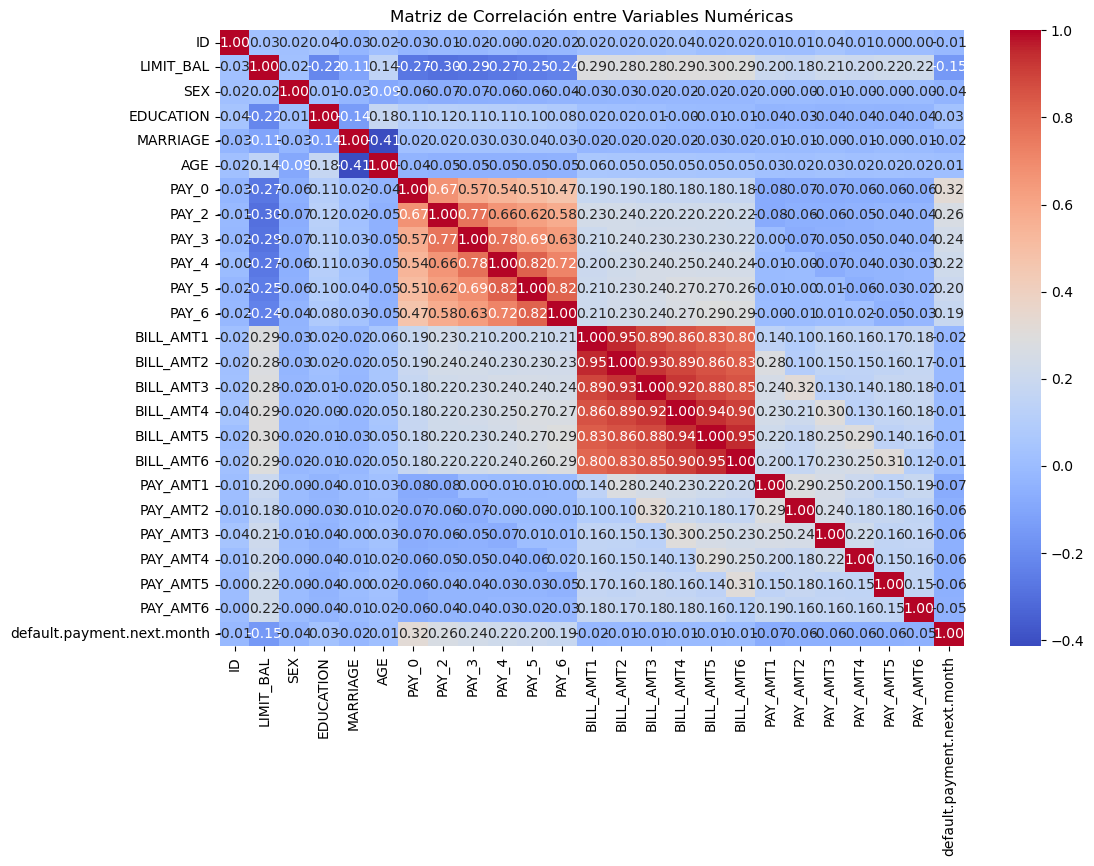

In [6]:
# Matriz de correlación de las variables numéricas
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


In [19]:
# Codificación de variables categóricas (dummy encoding)
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Escalado de variables numéricas
scaler = StandardScaler()
cols_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Dividir los datos en entrenamiento y prueba
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar la preparación
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(21000, 30) (9000, 30) (21000,) (9000,)


Precisión: 0.8094444444444444
Matriz de Confusión:
 [[6826  214]
 [1501  459]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



C:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


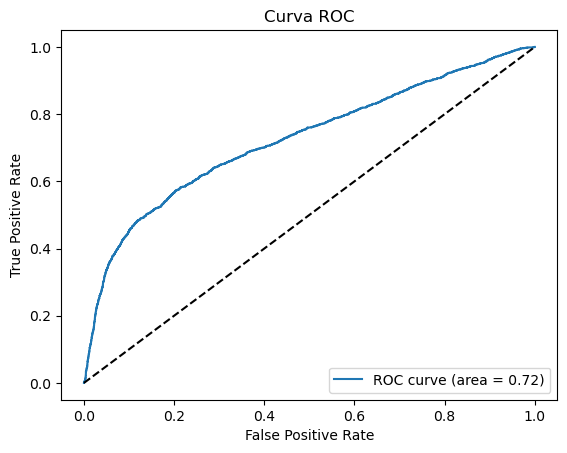

In [20]:
# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Curva ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


In [21]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')